In [1]:
!pip install -q plotly nbformat requests pandas

# Python Modules used
- zipfile - inbuilt module to unzip and extract files
- io - inbuilt module for IO processing 
- requests - module to make API calls
- pandas - module to work with data frame. Used alias as pd
- plotly - module to create plots. Used alias as go for graph_objs and imported some sub-packages

In [2]:
import zipfile
import io

import requests
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot

import warnings
warnings.filterwarnings("ignore")

# Problem statement: Nursing facilities

Explore the data of Nursing facilities in US, perform analysis specific to a city, Oregon
- The number of Nursing Facilities in Cities
- Average HCC Score of Nursing Facilities in States
- Oregon Nursing Facilities
    - Number, Stays Days, Charges, Medicare Allowed, HCC Score, Beneficiaries by Gender
    - 10 Nursing Facilities with the Highest HCC

# Data set 1
    - local csv file 
    - https://data.cms.gov/provider-data/topics/nursing-homes
    - This data set provides information on the nursing homes in US and the details about the below fields
    - Nursing facilities.csv
    - details
        RangeIndex: 15026 entries, 0 to 15025
        Data columns (total 41 columns):
        -    N   Column                                                Non-Null Count  Dtype  
        -    0   provider_id                                           15026 non-null  int64  
        -    1   facility_name                                         15026 non-null  object 
        -    2   street_address                                        15026 non-null  object 
        -    3   city                                                  15026 non-null  object 
        -    4   state                                                 15026 non-null  object 
        -    5   zip_code                                              15026 non-null  int64  
        -    6   total_stays                                           15026 non-null  int64  
        -    7   distinct_beneficiaries_per_provider                   15026 non-null  int64  
        -    8   average_length_of_stays_days                          15026 non-null  float64
        -    9   total_snf_charge_amount                               15026 non-null  int64  
        -    10  total_snf_medicare_allowed_amount                     15026 non-null  int64  
        -    11  total_snf_medicare_payment_amount                     15026 non-null  int64  
        -    12  total_snf_medicare_standard_payment_amount            15026 non-null  int64  
        -    13  average_age                                           15026 non-null  int64  
        -    14  male_beneficiaries                                    13370 non-null  float64
        -    15  female_beneficiaries                                  13370 non-null  float64
        -    16  nondual_beneficiaries                                 12149 non-null  float64
        -    17  dual_beneficiaries                                    12149 non-null  float64
        -    18  white_beneficiaries                                   14629 non-null  float64
        -    19  black_beneficiaries                                   8934 non-null   float64
        -    20  asian_pacific_islander_beneficiaries                  9557 non-null   float64
        -    21  hispanic_beneficiaries                                8037 non-null   float64
        -    22  american_indian_or_alaska_native_beneficiaries        11469 non-null  float64
        -    23  other_unknown_beneficiaries                           5496 non-null   float64
        -    24  average_hcc_score                                     15026 non-null  float64
        -    25  percent_of_beneficiaries_with_atrial_fibrillation     15025 non-null  float64
        -    26  percent_of_beneficiaries_with_alzheimers              14101 non-null  float64
        -    27  percent_of_beneficiaries_with_asthma                  15026 non-null  int64  
        -    28  percent_of_beneficiaries_with_cancer                  15026 non-null  int64  
        -    29  percent_of_beneficiaries_with_chf                     14747 non-null  float64
        -    30  percent_of_beneficiaries_with_chronic_kidney_disease  14735 non-null  float64
        -    31  percent_of_beneficiaries_with_copd                    14991 non-null  float64
        -    32  percent_of_beneficiaries_with_depression              14619 non-null  float64
        -    33  percent_of_beneficiaries_with_diabetes                14872 non-null  float64
        -    34  percent_of_beneficiaries_with_hyperlipidemia          13629 non-null  float64
        -    35  percent_of_beneficiaries_with_hypertension            231 non-null    float64
        -    36  percent_of_beneficiaries_with_ihd                     13917 non-null  float64
        -    37  percent_of_beneficiaries_with_osteoporosis            15024 non-null  float64
        -    38  percent_of_beneficiaries_with_ra_oa                   14318 non-null  float64
        -    39  percent_of_beneficiaries_with_schizophrenia           14885 non-null  float64
        -    40  percent_of_beneficiaries_with_stroke                  15026 non-null  int64  
        dtypes: float64(25), int64(12), object(4)
        memory usage: 4.7+ MB


# Data set 2
    - web xlsx file 
    - https://simplemaps.com/static/data/us-cities/1.77/basic/simplemaps_uscities_basicv1.77.zip 
    - This data set provides information about the cities in US and their latitude and longitude
    - US Cities.xlsx file
    - details
        RangeIndex: 30844 entries, 0 to 30843
        Data columns (total 17 columns):
        -    N   Column        Non-Null Count  Dtype   
        -   0   city          30844 non-null  object 
        -   1   city_ascii    30844 non-null  object 
        -   2   state_id      30844 non-null  object 
        -   3   state_name    30844 non-null  object 
        -   4   county_fips   30844 non-null  int64  
        -   5   county_name   30844 non-null  object 
        -   6   lat           30844 non-null  float64
        -   7   lng           30844 non-null  float64
        -   8   population    30844 non-null  int64  
        -   9   density       30844 non-null  float64
        -   10  source        30844 non-null  object 
        -   11  military      30844 non-null  bool   
        -   12  incorporated  30844 non-null  bool   
        -   13  timezone      30844 non-null  object 
        -   14  ranking       30844 non-null  int64  
        -   15  zips          30842 non-null  object 
        -   16  id            30844 non-null  int64  
        
        dtypes: bool(2), float64(3), int64(4), object(8)
        memory usage: 3.6+ MB


# Data Transformations
    - Changes dtypes of columns to be common in both datasets
        - us_cities_df - city, state_id
        - nursing_facilities_df - facility_name, city, state
    

# Data Merge / join
    - Join the two dfs with city from both data sets
    - Merge the two dfs with state and state_id  

# Data Visualizations
    - Number of Nursing facility per city in US
    - Average HCC score of nursing facilities in US Cities
    - Summary of Nursing facilities in a region - Oregon

## 1. The number of Nursing Facilities in Cities

Find out the number of nursing facilities that are available in US based on cities

In [3]:
# Data Source - Web, Data Format - xlsx
def get_us_cities_df():
    """Get the xlsx file from the url - https://simplemaps.com/data/us-cities

    Returns:
        pd.DataFrame: DataFrame containing the US cities details
    """
    zip_url = "https://simplemaps.com/static/data/us-cities/1.77/basic/simplemaps_uscities_basicv1.77.zip" # 
    response = requests.get(zip_url)

    us_cities_df = pd.DataFrame()
    if response.status_code == 200:
        zip_file = zipfile.ZipFile(io.BytesIO(response.content))
        file_list = zip_file.namelist()
        for file in zip_file.namelist() :
            if file.endswith(".xlsx"):
                xlsx_file = file
        with zip_file.open(xlsx_file) as csvfile:
            us_cities_df = pd.read_excel(csvfile)
            us_cities_df.to_excel('/content/final/inputs/web/us_cities.xlsx')
        return us_cities_df
    

us_cities_df = get_us_cities_df()
# us_cities_df.head()
assert not us_cities_df.empty, "US City extraction failed"

In [4]:
us_cities_df.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18908608,11226.2,shape,False,True,America/New_York,1,11229 11228 11226 11225 11224 11222 11221 1122...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,11922389,3202.3,shape,False,True,America/Los_Angeles,1,91367 90291 90293 90292 91316 91311 90035 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8497759,4648.7,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,6080145,4728.2,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Houston,Houston,TX,Texas,48201,Harris,29.7860,-95.3885,5970127,1382.2,shape,False,True,America/Chicago,1,77069 77068 77061 77060 77063 77062 77065 7706...,1840020925


In [5]:
# Data Source - Local, Data Format - csv
def get_nursing_facilities_df():
    return pd.read_csv("/content/final/inputs/local/nursing_facilities.csv", index_col=False)

nursing_facilities_df = get_nursing_facilities_df()
assert not nursing_facilities_df.empty, "Nursing Facility extraction failed"

In [6]:
nursing_facilities_df.head()

,provider_id,facility_name,street_address,city,state,zip_code,total_stays,distinct_beneficiaries_per_provider,average_length_of_stays_days,total_snf_charge_amount,...,percent_of_beneficiaries_with_copd,percent_of_beneficiaries_with_depression,percent_of_beneficiaries_with_diabetes,percent_of_beneficiaries_with_hyperlipidemia,percent_of_beneficiaries_with_hypertension,percent_of_beneficiaries_with_ihd,percent_of_beneficiaries_with_osteoporosis,percent_of_beneficiaries_with_ra_oa,percent_of_beneficiaries_with_schizophrenia,percent_of_beneficiaries_with_stroke
0,235618,HEARTLAND HEALTH CARE CENTER-CANTON,7025 LILLEY ROAD,CANTON,MI,48187,1104,829,25.1,19747896,...,40.0,51.0,47.0,70.0,NaN,68.0,20.0,69.0,10.0,17
1,495217,MANORCARE HEALTH SERVICES-FAIR OAKS,12475 LEE JACKSON MEMORIAL HIGHWAY,FAIRFAX,VA,22033,436,350,26.3,7541494,...,29.0,43.0,46.0,72.0,NaN,54.0,17.0,53.0,11.0,19
2,495121,CHERRYDALE HEALTH AND REHABILITATION CENTER,3710 LEE HIGHWAY,ARLINGTON,VA,22207,353,289,23.1,5630761,...,34.0,49.0,49.0,67.0,NaN,50.0,14.0,47.0,24.0,19
3,225554,COOLIDGE HOUSE,30 WEBSTER STREET,BROOKLINE,MA,2446,368,297,19.5,5878484,...,16.0,55.0,46.0,68.0,NaN,45.0,25.0,65.0,15.0,12
4,235663,NOTTING HILL OF WEST BLOOMFIELD,6535 DRAKE ROAD,W BLOOMFIELD,MI,48322,871,697,27.2,15794026,...,29.0,50.0,49.0,74.0,NaN,67.0,23.0,70.0,10.0,17


In [7]:
def perform_data_transformations():
    us_cities_df['city'] = us_cities_df['city'].str.upper().str.strip()
    us_cities_df['state_id'] = us_cities_df['state_id'].str.upper().str.strip()
    nursing_facilities_df['facility_name'] = nursing_facilities_df['facility_name'].str.upper().str.strip()
    nursing_facilities_df['city'] = nursing_facilities_df['city'].str.upper().str.strip()
    nursing_facilities_df['state'] = nursing_facilities_df['state'].str.upper().str.strip()
perform_data_transformations()

In [8]:
def perform_visualize_1(df_result):
    df_result.loc[:,'text'] = df_result['city'] + '<br>The number of nursing facilities:' + (df_result['total_facilities']).astype(str)
    limits = [(0,3),(4,10),(11,20),(21,50),(50,100),(101,500),(501,5600)]
    colors = ["royalblue","lightseagreen"," yellowgreen","yellow","orange","crimson","lightgrey"]
    fig = go.Figure()
    for i in range(len(limits)):
        lim = limits[i]
        df_sub = df_result[lim[0]:lim[1]]
        fig.add_trace(go.Scattergeo(
            locationmode = 'USA-states',
            lon = df_sub['lng'],
            lat = df_sub['lat'],
            text = df_sub['text'],
            marker = dict(
                size = df_sub['total_facilities']*2,
                color = colors[i],
                line_color='rgb(40,40,40)',
                line_width=0.5,
                sizemode = 'area'
            ),
            name = '{0} - {1}'.format(lim[0],lim[1])))
    fig.update_layout(
            title_text = 'US Nursing facilities<br>(Click legend to toggle traces)',
            showlegend = True,
            legend_title_text='Total Nursing Facilities Ranking',
            geo = dict(
                scope = 'usa',
                landcolor = 'rgb(217, 217, 217)'
            )
        )
    fig.show()

In [9]:
def perform_data_merge_operation_1_and_visualize():
    df_grouped = nursing_facilities_df.groupby(['city', 'state']).size().reset_index(name='total_facilities').sort_values(by='total_facilities', ascending=False)
    df_merge = pd.merge(df_grouped, us_cities_df, how='inner', left_on=['city', 'state'], right_on=['city', 'state_id'])
    df_result = df_merge[['city', 'state', 'total_facilities', 'lat', 'lng', 'population']]
    print(df_result.head())
    perform_visualize_1(df_result)
    return df_result

In [10]:
result_df = perform_data_merge_operation_1_and_visualize()

          city state  total_facilities      lat       lng  population
0      CHICAGO    IL                76  41.8375  -87.6866     8497759
1  LOS ANGELES    CA                74  34.1141 -118.4068    11922389
2   CINCINNATI    OH                66  39.1413  -84.5060     1692702
3      HOUSTON    TX                65  29.7860  -95.3885     5970127
4  SAN ANTONIO    TX                58  29.4632  -98.5238     2058444


## 2. Average HCC Score of Nursing Facilities in States

The Center for Medicare & Medicaid Services (CMS) uses a Hierarchical Condition Category (HCC) risk adjustment model to calculate risk scores. CMS uses HCCs to reimburse Medicare Advantage plans based on the health of their members. It pays accurately for the predicted cost expenditures of patients by adjusting those payments based on demographic information and patient health status. The risk assessment data used is based on the diagnosis information pulled from claims and medical records which are collected by physician offices, hospital inpatient visits and in outpatient settings. CMS states that higher HCC scores means there is higher risk of chronic diseases while lower hcc indicates healthy population.

In [11]:
df_groupby= result_df[['state','total_facilities','population']].groupby("state").sum()
df_groupby['ratio'] = df_groupby['population']/df_groupby['total_facilities']
df_groupby['ratio'] = df_groupby['ratio'].astype('int')
df_groupby.sort_values(by=['ratio'], inplace=True)
df_groupby.reset_index(inplace=True)
df_hcc = nursing_facilities_df.groupby('state').agg(
    avg_hcc_score=('average_hcc_score', 'mean'),
    max_hcc_score=('average_hcc_score', 'max'),
    min_hcc_score=('average_hcc_score', 'min'),
    total_facilities=('average_hcc_score', 'count')
)
df_hcc['HCC_rank'] = df_hcc['avg_hcc_score'].rank(method='min')
df_hcc['FAC_desc'] = df_hcc['total_facilities'].rank(method='dense', ascending=False)
df_hcc = df_hcc.sort_values('avg_hcc_score')
df_hcc.reset_index(inplace=True)
print(df_hcc)

   state  avg_hcc_score  max_hcc_score  min_hcc_score  total_facilities  \
0     PR       1.322000           1.60           1.07                 5   
1     WY       1.744483           2.37           1.12                29   
2     SD       1.835960           3.02           0.97                99   
3     MT       1.851475           3.08           0.79                61   
4     MN       1.908153           3.99           1.17               352   
5     NE       1.912487           3.16           1.17               193   
6     HI       1.914000           2.75           0.75                35   
7     IA       1.915479           3.92           1.14               407   
8     VT       1.930556           2.44           1.54                36   
9     ND       1.937465           3.21           1.27                71   
10    NH       1.973108           2.69           1.15                74   
11    UT       1.982632           3.16           1.11                95   
12    ME       2.008081  

In [12]:
scl = [[0.0, 'rgb(255,233,225)'],[0.2, 'rgb(249,220,211)'],[0.4, 'rgb(227,192,183)'], [0.6, 'rgb(210,178,167)'],[0.8, 'rgb(182,151,146)'],[1.0, '#734842']]
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_hcc.state,
        z = df_hcc.avg_hcc_score,
        locationmode = 'USA-states',
        text = df_hcc.state,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Average HCC Scores")
        )
       ]
layout = dict(
        title = 'Average HCC Scores of Nursing Facilities in States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

## 3. Oregon Nursing Facilities

- 3.1.  FInd the below details for a particular city - Oregon
    - Duration of stay in days, 
    - Charges, 
    - Medicare Allowed, 
    - Beneficiaries by Gender

In [13]:
df_onfs = nursing_facilities_df.groupby('state').agg(
    average_length_of_stays_days=('average_length_of_stays_days', 'mean'),
    total_snf_charge_amount=('total_snf_charge_amount', 'sum'),
    total_snf_medicare_allowed_amount=('total_snf_medicare_allowed_amount', 'sum'),
    male_beneficiaries=('male_beneficiaries', 'sum'),
    female_beneficiaries=('female_beneficiaries', 'sum')
)

df_onfs['medicare_covered_rate'] = (df_onfs['total_snf_medicare_allowed_amount'] / df_onfs['total_snf_charge_amount']).round(2)
df_onfs['staylength_desc'] = df_onfs['average_length_of_stays_days'].rank(method='min', ascending=False)
df_onfs['coveredrate_desc'] = (df_onfs['total_snf_medicare_allowed_amount'] / df_onfs['total_snf_charge_amount']).rank(method='min', ascending=False)

df_onfs = df_onfs.sort_values(['average_length_of_stays_days', 'coveredrate_desc'], ascending=[False, True])
df_onfs.reset_index(inplace=True)

print(df_onfs)

   state  average_length_of_stays_days  total_snf_charge_amount  \
0     LA                     32.734694                612007868   
1     IN                     32.112916               1274289312   
2     MS                     31.970854                537267672   
3     TX                     31.811833               3055203876   
4     TN                     30.347840               1057551189   
5     IL                     30.319182               2741639733   
6     DC                     29.855556                 85834021   
7     KY                     29.226389                757835744   
8     WV                     29.178261                235398551   
9     CA                     28.833487               4129568330   
10    NY                     28.633010               2745088971   
11    WY                     28.555172                 62252566   
12    NE                     28.475130                335112545   
13    SC                     28.457068                60074193

In [14]:
df_onfs[df_onfs['state']=="OR"]

,state,average_length_of_stays_days,total_snf_charge_amount,total_snf_medicare_allowed_amount,male_beneficiaries,female_beneficiaries,medicare_covered_rate,staylength_desc,coveredrate_desc
46,OR,24.428099,291077563,202223598,5557.0,7557.0,0.69,47.0,31.0


In [15]:
fig=go.Figure()
fig.add_trace(go.Scatter(
    x=[0, 1, 2, 3, 4],
    y=[1.6, 1.6, 1.6, 1.6,1.6],
    mode="text", 
    text=["<span style='font-size:25px'><b>119</b></span>",
          "<span style='font-size:25px'><b>36979:1</b></span>",
          "<span style='font-size:25px'><b>24.43</b></span>",
          "<span style='font-size:25px'><b>291.08M</b></span>",
          "<span style='font-size:25px'><b>202.22M</b></span>"],
    textposition="bottom center"
))
fig.add_trace(go.Scatter(
    x=[0, 1, 2, 3, 4],
    y=[1.1, 1.1, 1.1, 1.1, 1.1],
    mode="text", 
    text=["Nursing Facilities","Population:Facilities", "Average Stays Days", "Charges", "Medicare Allowed Charges"],
    textposition="bottom center"
))
fig.add_hline(y=2.2, line_width=5, line_color='gray')
fig.add_hline(y=0.3, line_width=3, line_color='gray')
fig.update_yaxes(visible=False)
fig.update_xaxes(visible=False)
fig.update_layout(height=300, hovermode=False, showlegend=False,
                  title="Oregon Nursing Facilities Summary", title_x=0.5, title_y=0.9,
                  xaxis_range=[-0.5,4.6], yaxis_range=[-0.2,2.2],                 
                  margin=dict(t=90, b=0, l=70, r=70),
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=35, color='#8a8d93'),
                  font=dict(size=16, color='#8a8d93'),
                 )

In [16]:
fig = make_subplots(rows=1, cols=3, vertical_spacing=1, specs=[[{"type": "bar"},{"type": "pie"},{"type": "pie"}]],
                    column_widths=[0.4, 0.3,0.3], 
                    subplot_titles=("HCC Score<br>", "Charges<br>", "Beneficiaries<br>"))

fig.add_trace(go.Bar(x=[1.33,2.06,3.97], y=['Min','Avg','Max'], marker_color='#334668', text=[1.33,2.06,3.97], textposition = "inside",
                     name='HCC Score', orientation='h',showlegend=False), 
                     row=1, col=1)
fig.add_trace(go.Pie(values=[202223598,291077563-202223598], labels=['Medicare Allowed','Medicare Uncovered'], name='Total Charges',
                     marker_colors=['#4c78a8','#72b7b2'],
                     hole=0.5, rotation=90, showlegend=False, 
                     hoverinfo='label+percent+value', textinfo='label'), 
                     row=1, col=2)
fig.add_trace(go.Pie(values=[5557,7557], labels=['Male','Female'], name='Beneficiaries',
                     marker_colors=['#4c78a8','#72b7b2'],
                     hole=0.5, rotation=90, showlegend=False, 
                     hoverinfo='label+percent+value', textinfo='label'), 
                     row=1, col=3)

# styling
fig.update_yaxes(showgrid=False, ticksuffix=' ', categoryorder='total ascending')
fig.update_xaxes(visible=False)
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_layout(height=360,  yaxis_title='', barmode='stack',
                  margin=dict(t=70, b=40, l=0, r=70),               
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  font=dict(size=13, color='#8a8d93'))
fig.show()

- 3.2.  Top 10 Nursing Facilities with the Highest HCC

In [17]:
df_or = nursing_facilities_df[nursing_facilities_df['state'] == 'OR']
df_sorted = df_or[['facility_name', 'city', 'average_hcc_score', 'average_length_of_stays_days', 'total_snf_charge_amount', 'total_snf_medicare_allowed_amount']]\
                .sort_values('average_hcc_score', ascending=False)
df_sorted['medicare_covered_rate'] = (df_sorted['total_snf_medicare_allowed_amount'] / df_sorted['total_snf_charge_amount']).round(2)
df_plot1 = df_sorted.head(10)
df_plot1

,facility_name,city,average_hcc_score,average_length_of_stays_days,total_snf_charge_amount,total_snf_medicare_allowed_amount,medicare_covered_rate
10424,TRINITY MISSION HEALTH & REHAB OF PORTLAND,PORTLAND,3.97,35.8,968784,639433,0.66
12963,PRESTIGE POST-ACUTE & REHAB CENTER -OAKWOOD,MCMINNVILLE,3.13,25.9,1588287,875126,0.55
13838,REGENCY GRESHAM NURSING & REHAB CENTER,GRESHAM,2.97,32.8,1720422,1622576,0.94
5392,CHEHALEM HEALTH & REHAB,NEWBERG,2.91,25.7,1908121,1071667,0.56
5572,PRESTIGE POST-ACUTE & REHABILITATION CTR-GRESHAM,GRESHAM,2.85,25.7,1768884,1288703,0.73
1320,MARQUIS PIEDMONT POST ACUTE REHAB,PORTLAND,2.79,25.0,3469254,1654297,0.48
12892,LAUREL HILL NURSING CENTER,GRANTS PASS,2.76,23.2,910781,771922,0.85
11794,AVAMERE REHABILITATION OF CLACKAMAS,GLADSTONE,2.75,16.1,531848,375705,0.71
10724,PACIFIC HEALTH AND REHABILITATION,TIGARD,2.67,21.8,621224,437037,0.70
4978,CARE CENTER EAST HLTH,PORTLAND,2.66,25.0,632381,609696,0.96


In [18]:
fig = make_subplots(rows=1, cols=2, column_widths=[0.1,0.9], shared_yaxes=True, horizontal_spacing=0)
fig.append_trace(go.Bar(x=df_plot1['average_hcc_score'], y=df_plot1['facility_name'], orientation='h', showlegend=True, 
                        text=df_plot1['average_hcc_score'], name='average_hcc_score', marker_color='#334668'), 1, 1)
fig.append_trace(go.Bar(x=-df_plot1['medicare_covered_rate'], y=df_plot1['facility_name'], orientation='h', showlegend=True, 
                        text=df_plot1['medicare_covered_rate'], name='medicare_covered_rate', marker_color='#6D83AA'), 1, 2)
fig.append_trace(go.Bar(x=df_plot1['average_length_of_stays_days'], y=df_plot1['facility_name'], orientation='h', showlegend=True, 
                        text=df_plot1['average_length_of_stays_days'], name='average_length_of_stays_days', marker_color='#496595'), 1, 2)
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(ticksuffix='  ')
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)),
                  textposition='auto')
fig.update_layout(height=500, barmode='overlay', 
                  title="<span style='font-size:40px; font-family:Times New Roman'>10 Nursing Facilities with the Highest HCC</span>",
                  margin=dict(t=110, b=35, l=120, r=40),               
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=18, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(size=13, color='#8a8d93'),
                  legend=dict(title="", orientation="v", yanchor="bottom", xanchor="center", x=0.83, y=1.05,
                              bordercolor="#fff", borderwidth=0.5, font_size=13))
fig.show()

Column: provider_id
Mean Squared Error: 23088.694699202933
R-squared Score: 0.004415175029348961


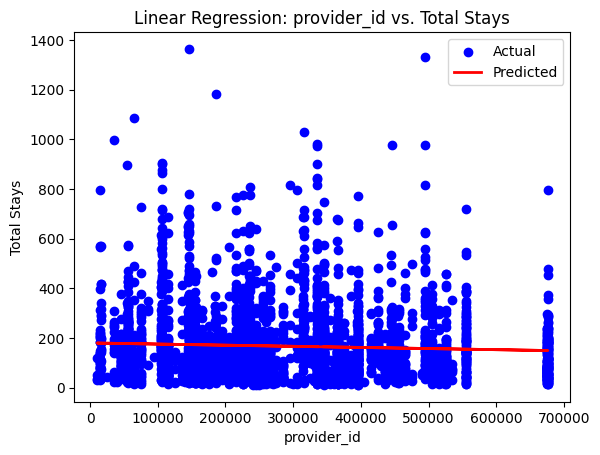

Column: zip_code
Mean Squared Error: 22586.05549030833
R-squared Score: 0.026088984455569952


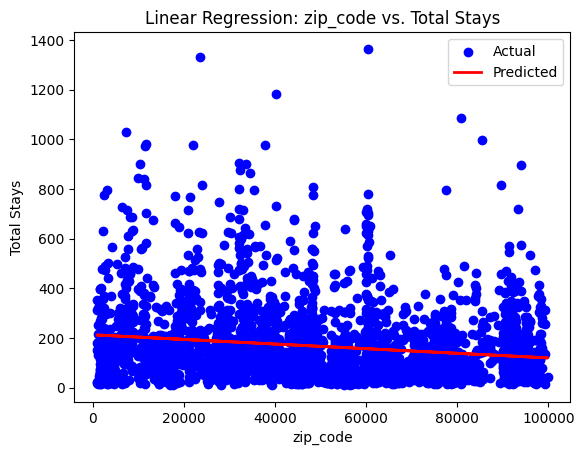

Column: distinct_beneficiaries_per_provider
Mean Squared Error: 239.27606812437534
R-squared Score: 0.9896824127345971


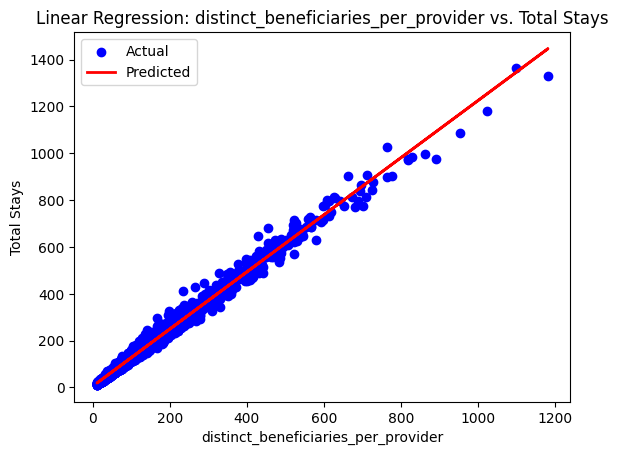

Column: average_length_of_stays_days
Mean Squared Error: 22538.326204163386
R-squared Score: 0.028147071914027544


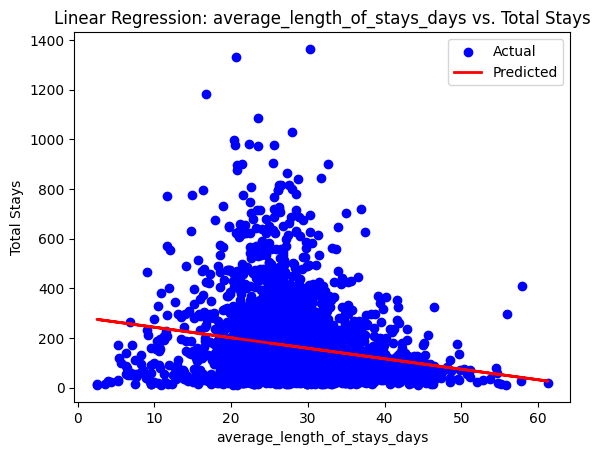

Column: total_snf_charge_amount
Mean Squared Error: 4703.328436927007
R-squared Score: 0.7971924147440388


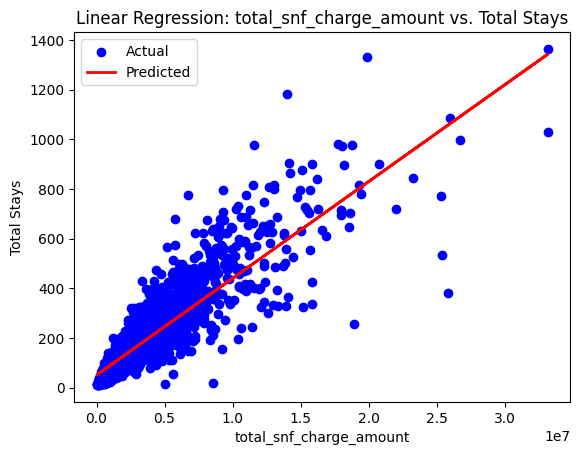

Column: total_snf_medicare_allowed_amount
Mean Squared Error: 3588.957187731951
R-squared Score: 0.8452441179492652


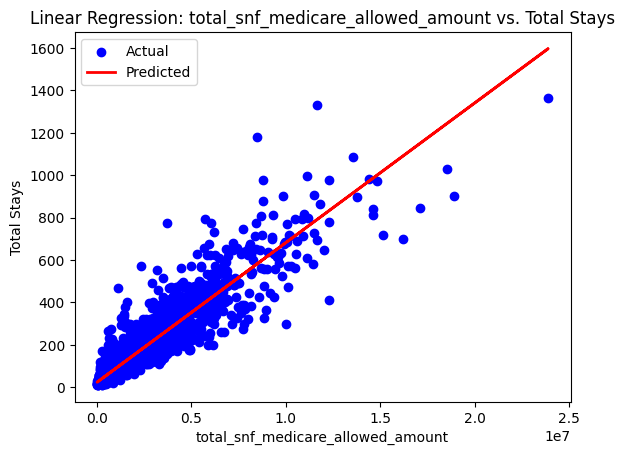

Column: total_snf_medicare_payment_amount
Mean Squared Error: 3266.9658094730576
R-squared Score: 0.8591283904966001


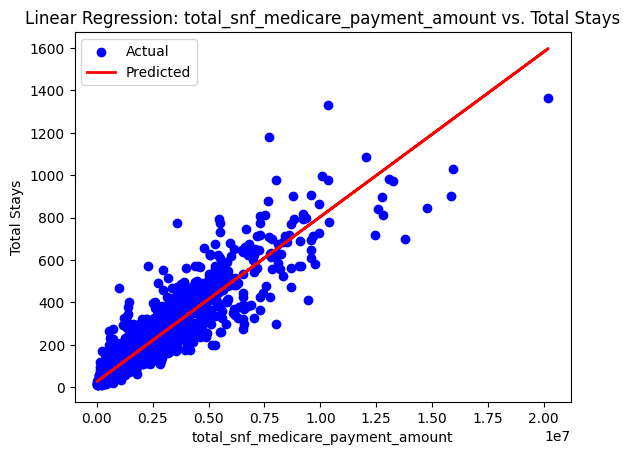

Column: total_snf_medicare_standard_payment_amount
Mean Squared Error: 2329.9997840373876
R-squared Score: 0.89953037807492


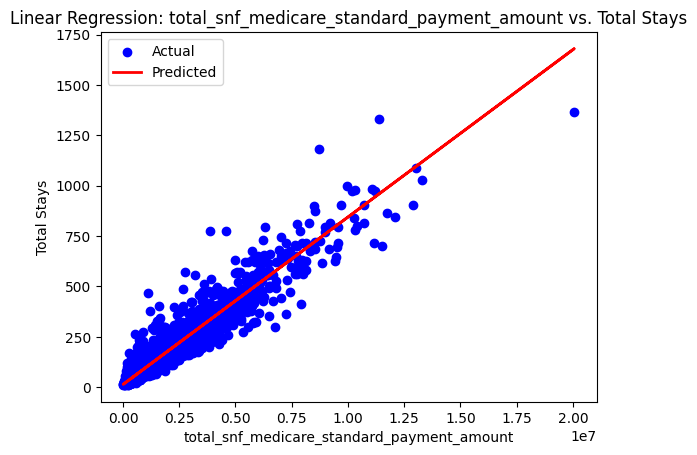

Column: average_age
Mean Squared Error: 23172.231079610672
R-squared Score: 0.0008130851862281352


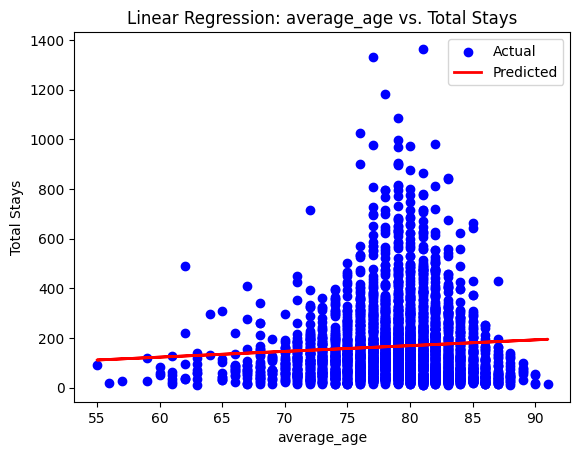

Column: male_beneficiaries
Mean Squared Error: 3755.3498980840354
R-squared Score: 0.8380692620481219


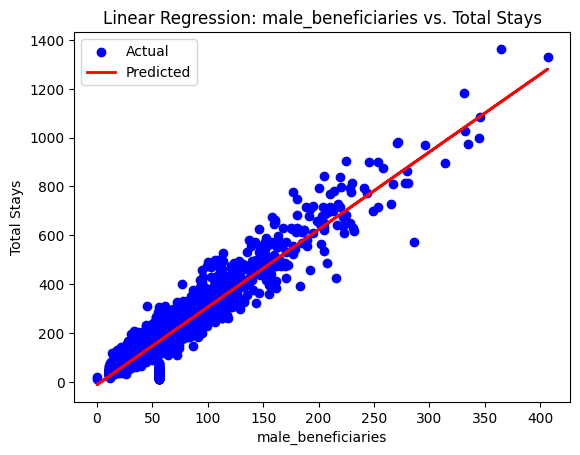

Column: female_beneficiaries
Mean Squared Error: 3229.4472921355155
R-squared Score: 0.8607461894671908


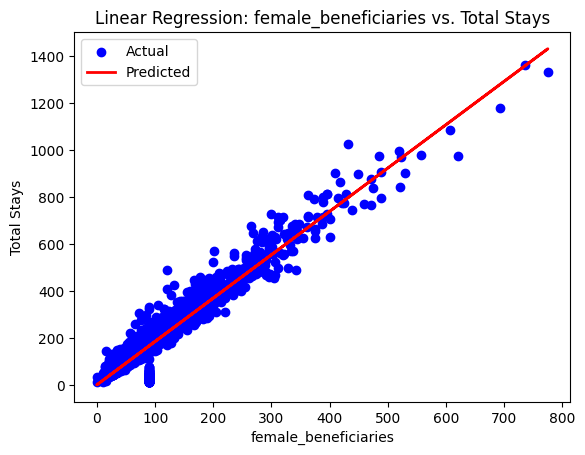

Column: nondual_beneficiaries
Mean Squared Error: 5847.007916627924
R-squared Score: 0.7478769402464757


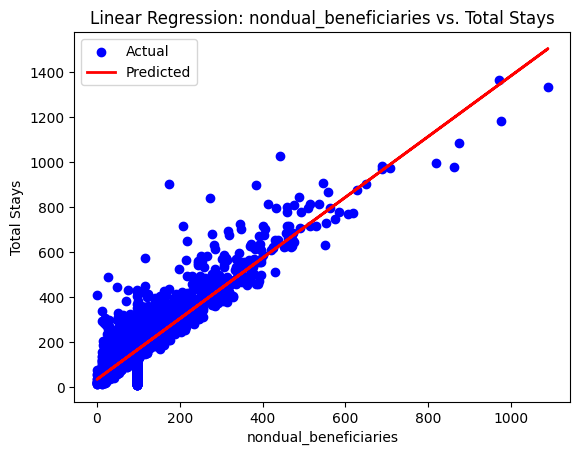

Column: dual_beneficiaries
Mean Squared Error: 14590.93796418785
R-squared Score: 0.37083855936927135


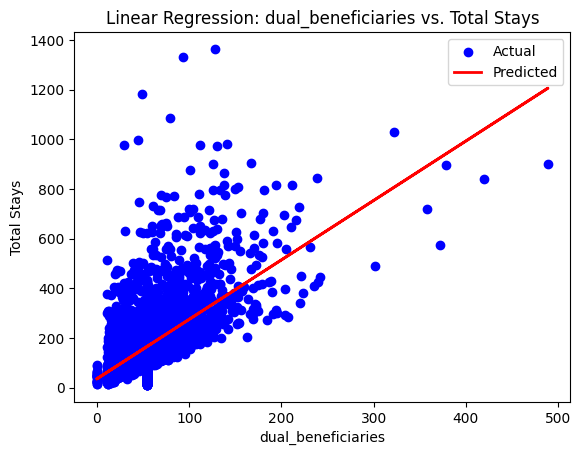

Column: white_beneficiaries
Mean Squared Error: 2952.3585081727283
R-squared Score: 0.8726942615464862


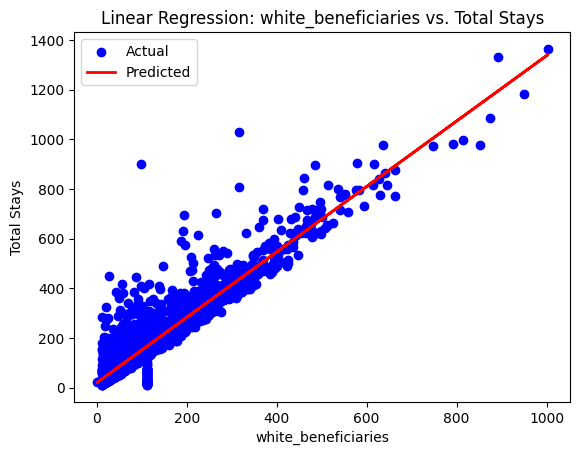

Column: black_beneficiaries
Mean Squared Error: 18172.72173767058
R-squared Score: 0.21639199503713402


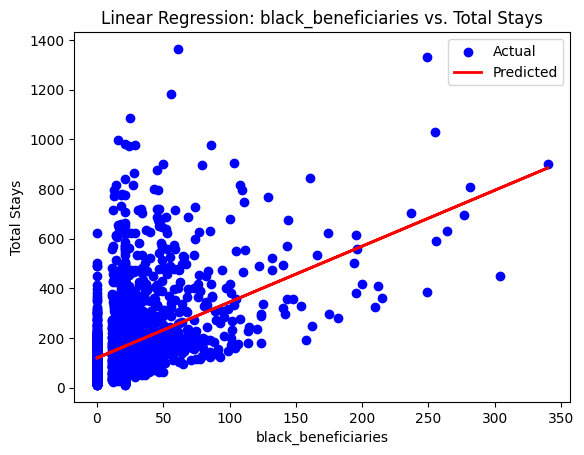

Column: asian_pacific_islander_beneficiaries
Mean Squared Error: 22506.883545494096
R-squared Score: 0.029502879777386637


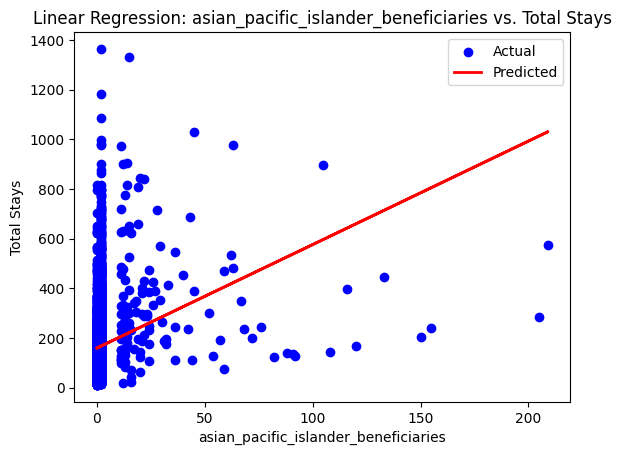

Column: hispanic_beneficiaries
Mean Squared Error: 20814.111314209775
R-squared Score: 0.1024952410846961


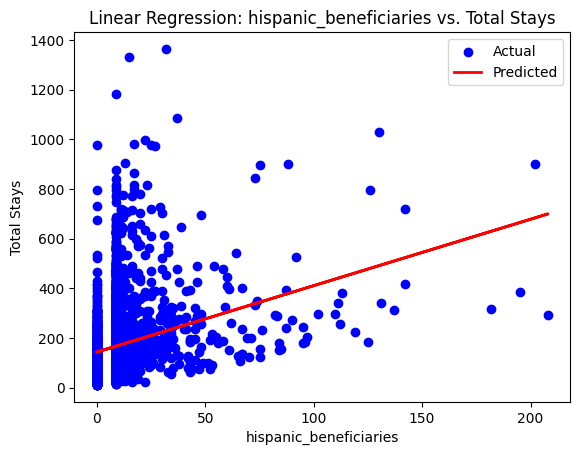

Column: american_indian_or_alaska_native_beneficiaries
Mean Squared Error: 23176.677471469826
R-squared Score: 0.0006213567096502448


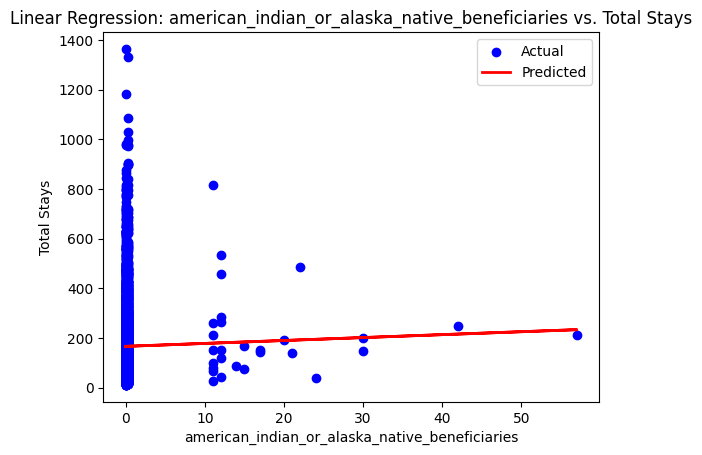

Column: other_unknown_beneficiaries
Mean Squared Error: 22605.56111227293
R-squared Score: 0.025247901774952064


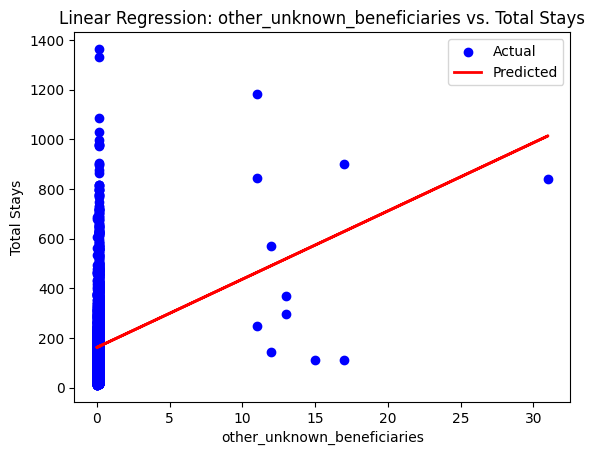

Column: average_hcc_score
Mean Squared Error: 23187.71689724716
R-squared Score: 0.0001453365221304459


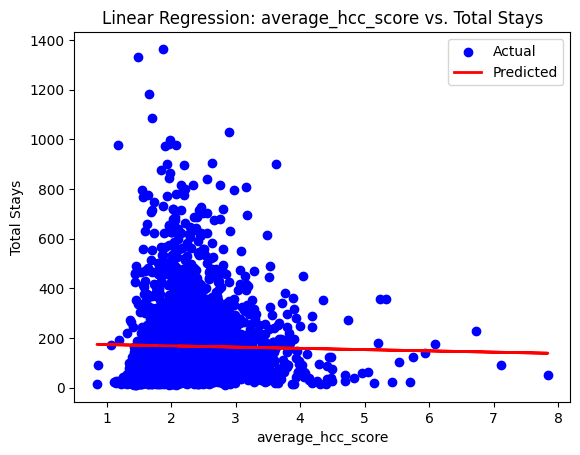

Column: percent_of_beneficiaries_with_atrial_fibrillation
Mean Squared Error: 22320.285230315167
R-squared Score: 0.03754900162955199


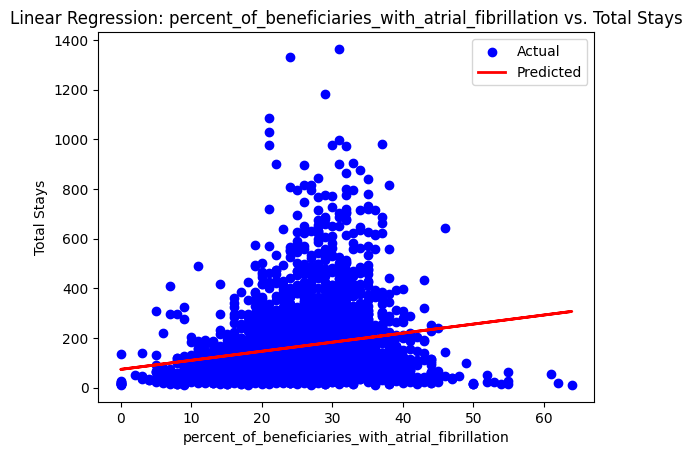

Column: percent_of_beneficiaries_with_alzheimers
Mean Squared Error: 22211.866632884252
R-squared Score: 0.042224013004298455


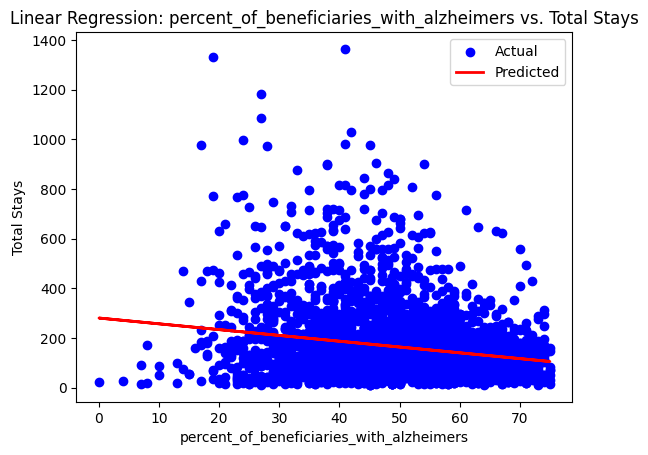

Column: percent_of_beneficiaries_with_asthma
Mean Squared Error: 22763.570523009104
R-squared Score: 0.018434533865638425


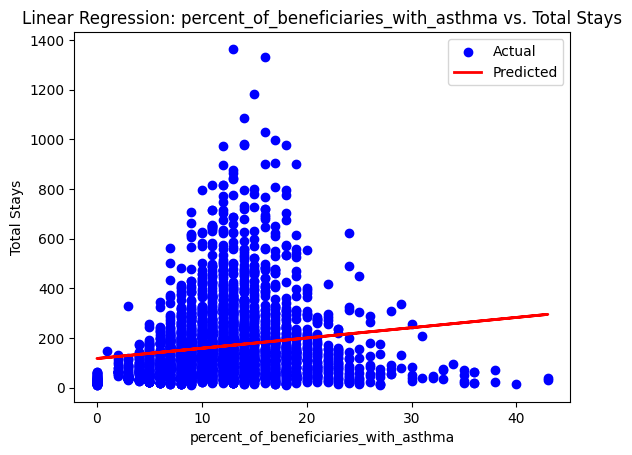

Column: percent_of_beneficiaries_with_cancer
Mean Squared Error: 22122.879355022065
R-squared Score: 0.04606114561873331


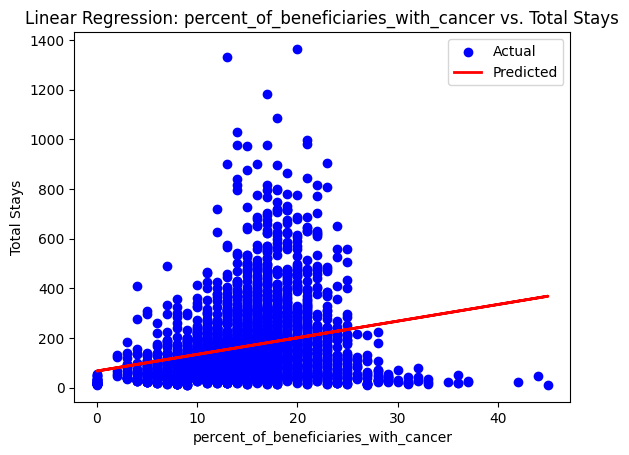

Column: percent_of_beneficiaries_with_chf
Mean Squared Error: 23163.15334791223
R-squared Score: 0.0012045170987663445


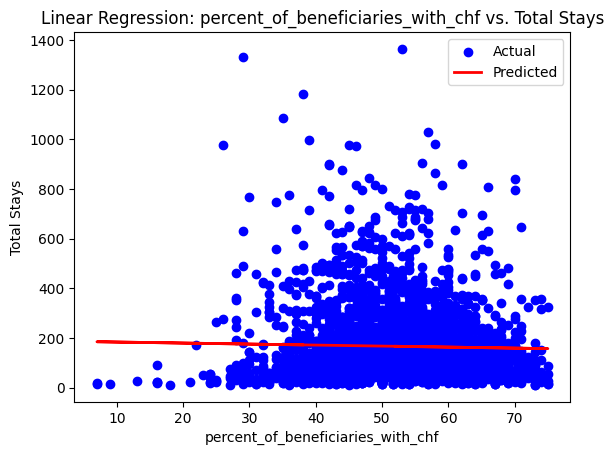

Column: percent_of_beneficiaries_with_chronic_kidney_disease
Mean Squared Error: 23185.100328686975
R-squared Score: 0.0002581629935248797


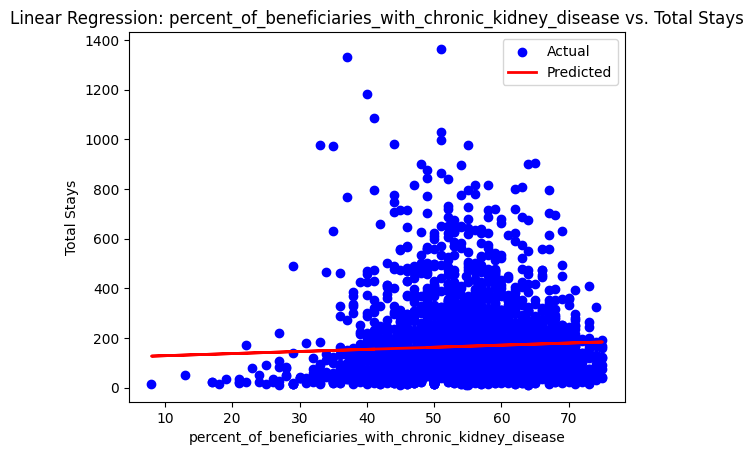

Column: percent_of_beneficiaries_with_copd
Mean Squared Error: 23121.674447591573
R-squared Score: 0.002993087836684505


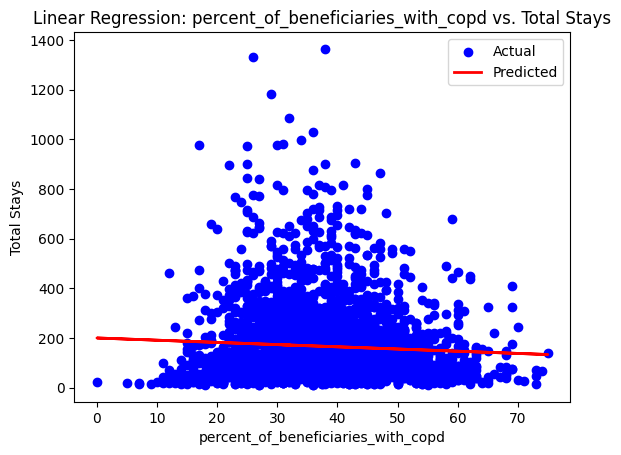

Column: percent_of_beneficiaries_with_depression
Mean Squared Error: 22916.777787541963
R-squared Score: 0.011828234564992268


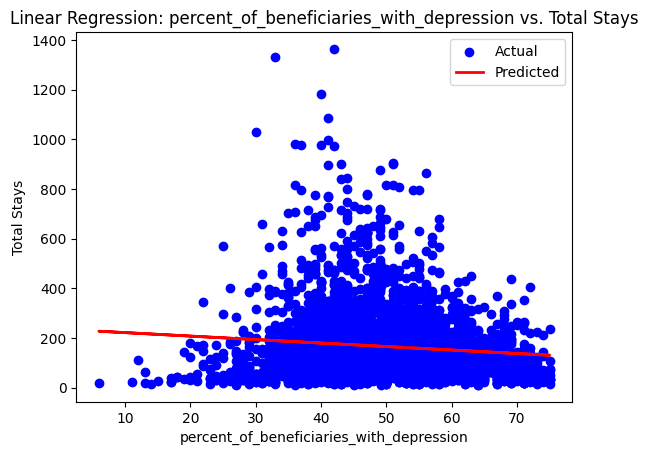

Column: percent_of_beneficiaries_with_diabetes
Mean Squared Error: 23188.345205353107
R-squared Score: 0.00011824386817849142


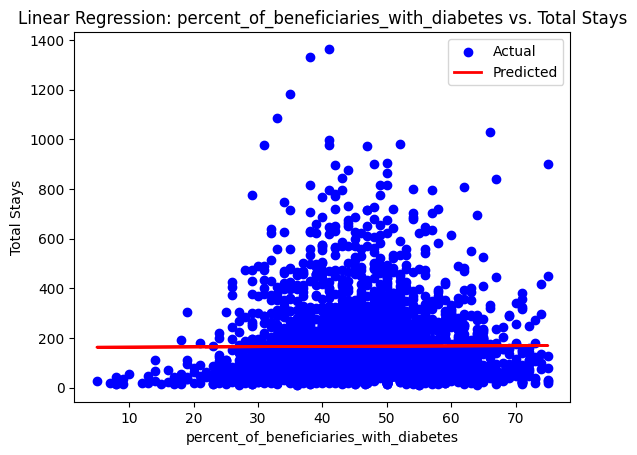

Column: percent_of_beneficiaries_with_hyperlipidemia
Mean Squared Error: 21010.58646181673
R-squared Score: 0.09402323008581936


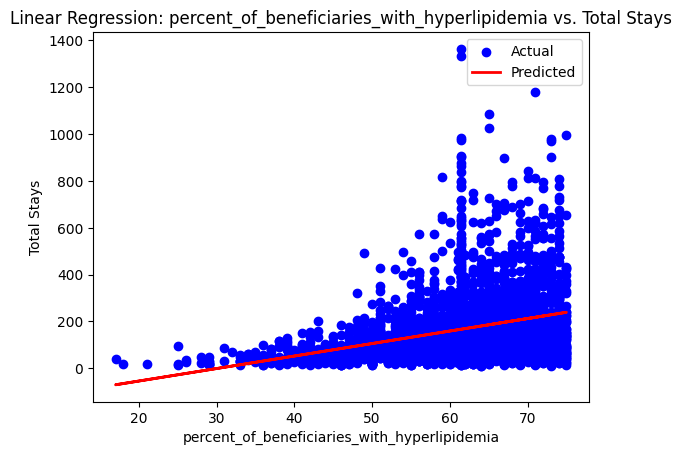

Column: percent_of_beneficiaries_with_hypertension
Mean Squared Error: 23191.714739170304
R-squared Score: -2.7050475193135526e-05


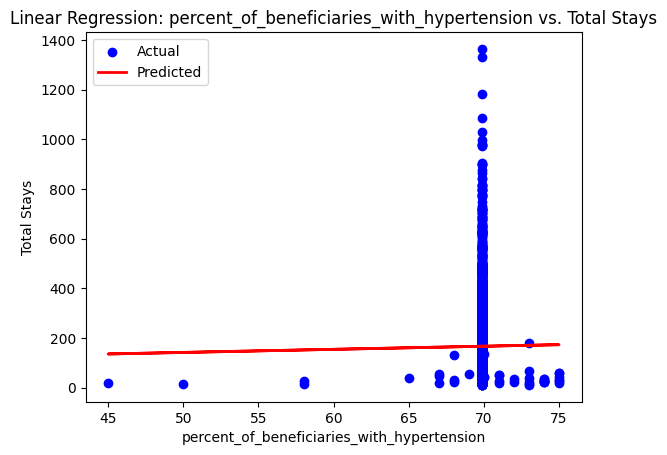

Column: percent_of_beneficiaries_with_ihd
Mean Squared Error: 22852.89391911136
R-squared Score: 0.01458290782818572


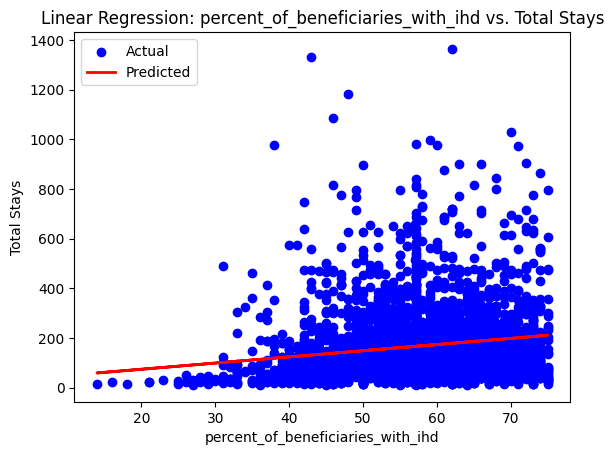

Column: percent_of_beneficiaries_with_osteoporosis
Mean Squared Error: 23072.126670495658
R-squared Score: 0.0051295886493277765


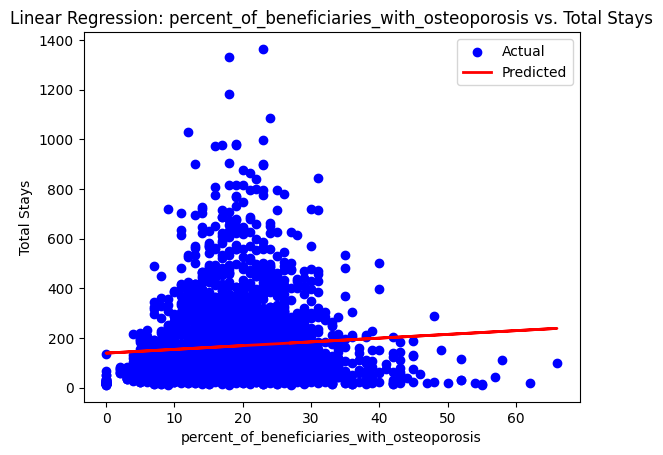

Column: percent_of_beneficiaries_with_ra_oa
Mean Squared Error: 21688.193780781836
R-squared Score: 0.06480479340763001


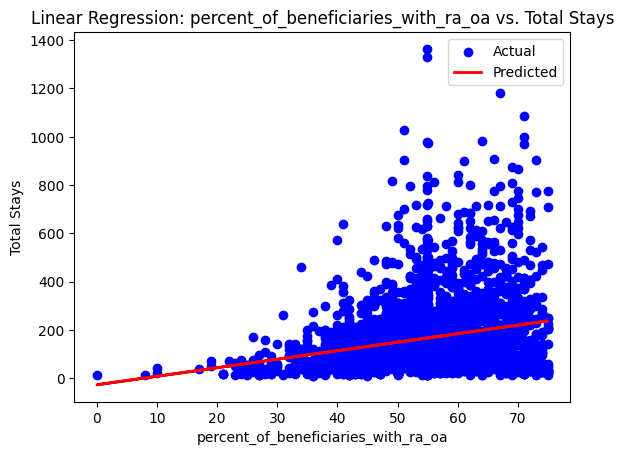

Column: percent_of_beneficiaries_with_schizophrenia
Mean Squared Error: 21615.36758659634
R-squared Score: 0.06794505987726052


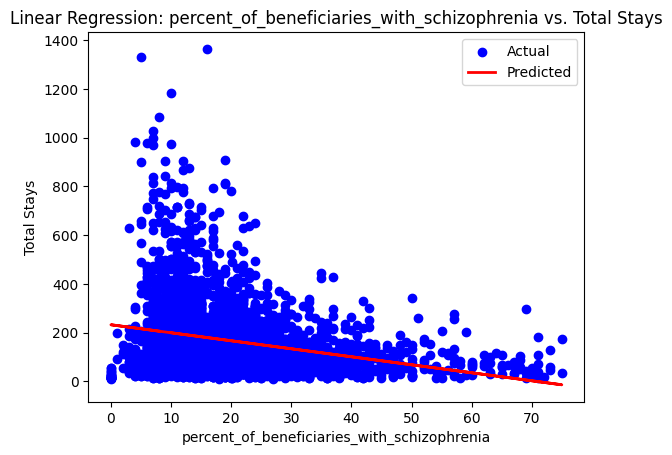

Column: percent_of_beneficiaries_with_stroke
Mean Squared Error: 23154.81328430016
R-squared Score: 0.0015641407535308405


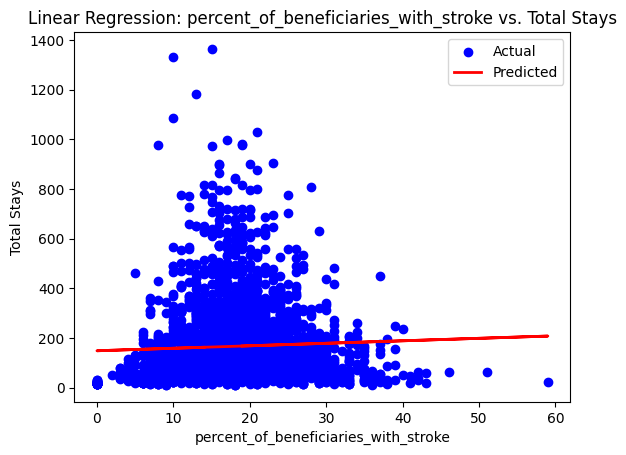

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

numerical_columns = nursing_facilities_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_columns.remove('total_stays') 

for column in numerical_columns:
    nursing_facilities_df[column].fillna(nursing_facilities_df[column].mean(), inplace=True)
    X = nursing_facilities_df[[column]]  # Feature
    y = nursing_facilities_df['total_stays']  # Target
    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Column: {column}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")

    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
    plt.xlabel(column)
    plt.ylabel('Total Stays')
    plt.title(f'Linear Regression: {column} vs. Total Stays')
    plt.legend()
    plt.show()


# Inference:

Some of the columns show relatively low R-squared values and high mean squared errors, indicating a poor fit for linear regression when predicting total_stays based solely on those columns. However, there are a few columns that show promising results:

- Stronger relationships:
distinct_beneficiaries_per_provider has a very high R-squared score of approximately 0.99, indicating a strong linear relationship with total_stays.
total_snf_medicare_standard_payment_amount, total_snf_medicare_payment_amount, total_snf_medicare_allowed_amount, and total_snf_charge_amount also show relatively high R-squared scores ranging from 0.79 to 0.90, suggesting a good relationship with the target variable.
- Weak relationships:
Several columns, such as provider_id, zip_code, and average_age, have very low R-squared values close to zero, indicating a weak or negligible linear relationship with total_stays.
- Mixed relationships:
Other columns like dual_beneficiaries, black_beneficiaries, and hispanic_beneficiaries exhibit moderate R-squared values, implying a moderate but not strong linear relationship

# Conclusion:
- The analysis done showcases that the beneficiaries of the medicare and the percentage of people who are covered by the medicare insurance
- The linear regression on the data set reveals that there is a strong relationship between distinct_beneficiaries_per_provider and total_stays
- Also there is a good relation between the charges incurred with respect to the average stay in a particular facility